In [1]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = tf.keras.models.load_model("1.keras")

In [3]:
BATCH_SIZE = 8
IMAGE_SIZE = 128
CHANNELS=3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [5]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [7]:

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


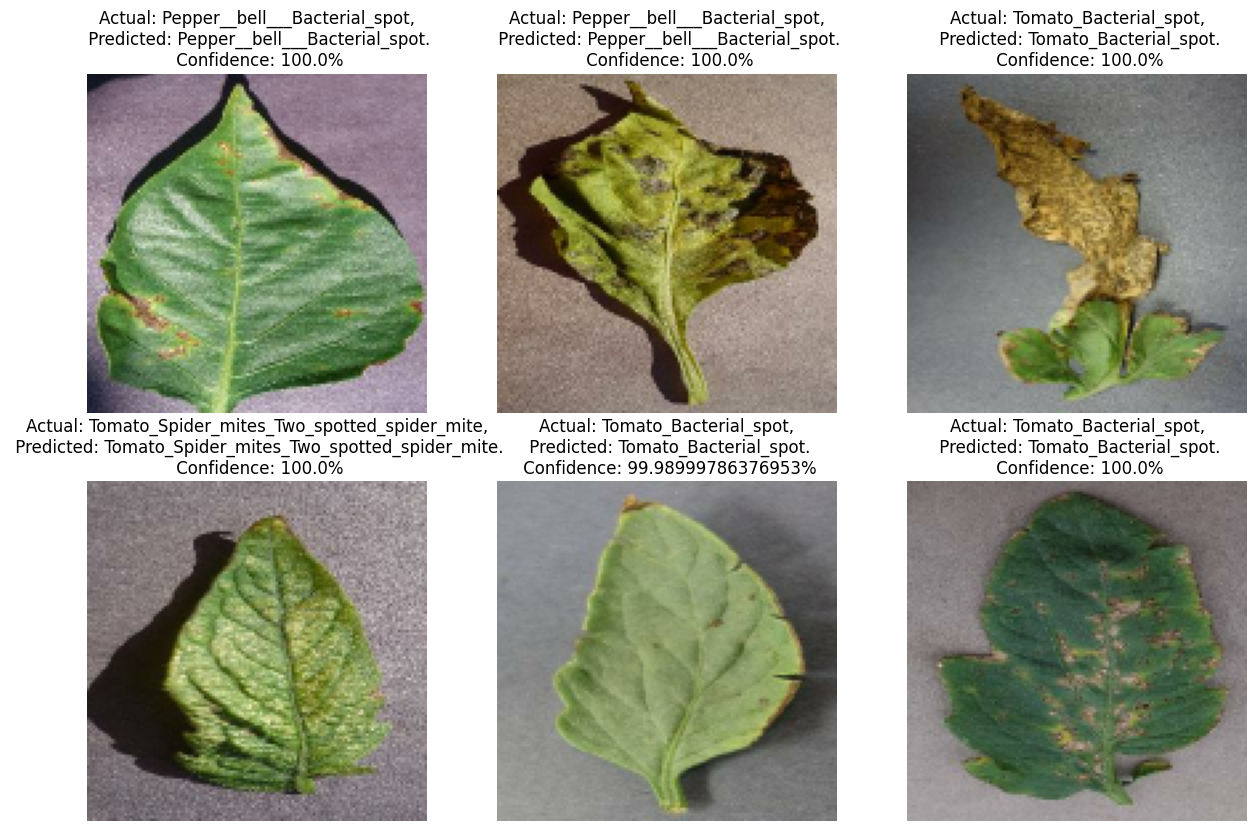

In [9]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: Tomato_Early_blight
Confidence: 100.0 %


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

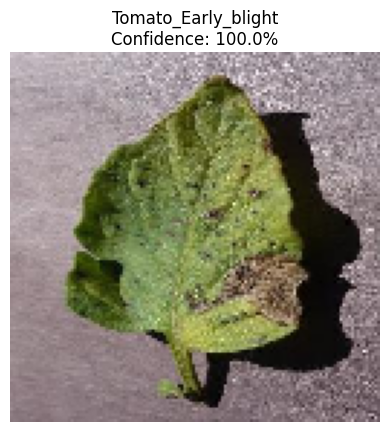

In [10]:
IMAGE_SIZE = 128  

# ===== 4) load_img  =====
img = tf.keras.preprocessing.image.load_img(
    r"C:\Users\Asus\Desktop\pro cv1\project-da450\model\PlantVillage\Tomato_Early_blight\00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG", 
    target_size=(IMAGE_SIZE, IMAGE_SIZE)
)

# ===== 5) preprocessing_image  =====
img_array = tf.keras.preprocessing.image.img_to_array(img)       
img_array = tf.expand_dims(img_array, 0) 

# ===== 6) predictions =====
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_index]
confidence = round(100 * np.max(predictions[0]), 2)

# ===== 7) predicted_class  =====
print("Predicted class:", predicted_class)
print("Confidence:", confidence, "%")

plt.imshow(img)
plt.title(f"{predicted_class}\nConfidence: {confidence}%")
plt.axis("off")